# Student Grades Prediction Model

Bu projemizde Ogrencileerin notlarini tahmin eden bir model gelistirecegiz.

<img src="https://i.pinimg.com/736x/ea/33/2a/ea332ab0f1de9bf702d2d51ba1b61ab3.jpg">

ğrencilerin not tahmini görevi için kullandığım veri seti, Portekiz okullarındaki öğrencilerin başarılarına dayanmaktadır. Bu veri setinde G1, ilk dönemin notlarını, G2, ikinci dönemin notlarını ve G3, final notlarını temsil eder. Biz de final notlarini tahmin edeceğiz

<a href="https://thecleverprogrammer.com/2021/04/16/student-grades-prediction-with-machine-learning/">Dataya Buradan Erişebilirsiniz</a>

In [6]:
import pandas as pd
pd.set_option("display.max_columns",100)

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("student-mat.csv")

### EDA

In [9]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [10]:
df.shape

(395, 33)

In [11]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
df["G1"].value_counts()

G1
10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
18     8
17     8
5      7
19     3
4      1
3      1
Name: count, dtype: int64

In [14]:
df["G2"].value_counts()

G2
9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
16    13
0     13
18    12
17     5
19     3
4      1
Name: count, dtype: int64

In [15]:
df["studytime"].value_counts()

studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

In [16]:
df["school"].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [17]:
df["famsize"].value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64

In [18]:
df["Pstatus"].value_counts()

Pstatus
T    354
A     41
Name: count, dtype: int64

In [19]:
df["Medu"].value_counts()

Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

In [20]:
df["Mjob"].value_counts()

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

In [21]:
df["Fjob"].value_counts()

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

In [22]:
df["reason"].value_counts()

reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

In [23]:
df["schoolsup"].value_counts()

schoolsup
no     344
yes     51
Name: count, dtype: int64

In [24]:
df["famsup"].value_counts()

famsup
yes    242
no     153
Name: count, dtype: int64

In [25]:
df["paid"].value_counts()

paid
no     214
yes    181
Name: count, dtype: int64

In [26]:
df["activities"].value_counts()

activities
yes    201
no     194
Name: count, dtype: int64

In [27]:
df["nursery"].value_counts()

nursery
yes    314
no      81
Name: count, dtype: int64

In [28]:
df["higher"].value_counts()

higher
yes    375
no      20
Name: count, dtype: int64

In [29]:
df["internet"].value_counts()

internet
yes    329
no      66
Name: count, dtype: int64

In [30]:
df["romantic"].value_counts()

romantic
no     263
yes    132
Name: count, dtype: int64

### Feature Engineering

In [32]:
d={"yes":1,"no":0}

In [33]:
df["schoolsup"]=df["schoolsup"].map(d)

In [34]:
df["famsup"]=df["famsup"].map(d)

In [35]:
df["paid"]=df["paid"].map(d)

In [36]:
df["activities"]=df["activities"].map(d)

In [37]:
df["nursery"]=df["nursery"].map(d)

In [38]:
df["higher"]=df["higher"].map(d)

In [39]:
df["internet"]=df["internet"].map(d)

In [40]:
df["romantic"]=df["romantic"].map(d)

In [41]:
df=df.drop(["address","guardian","age","traveltime","failures","schoolsup"],axis=1)

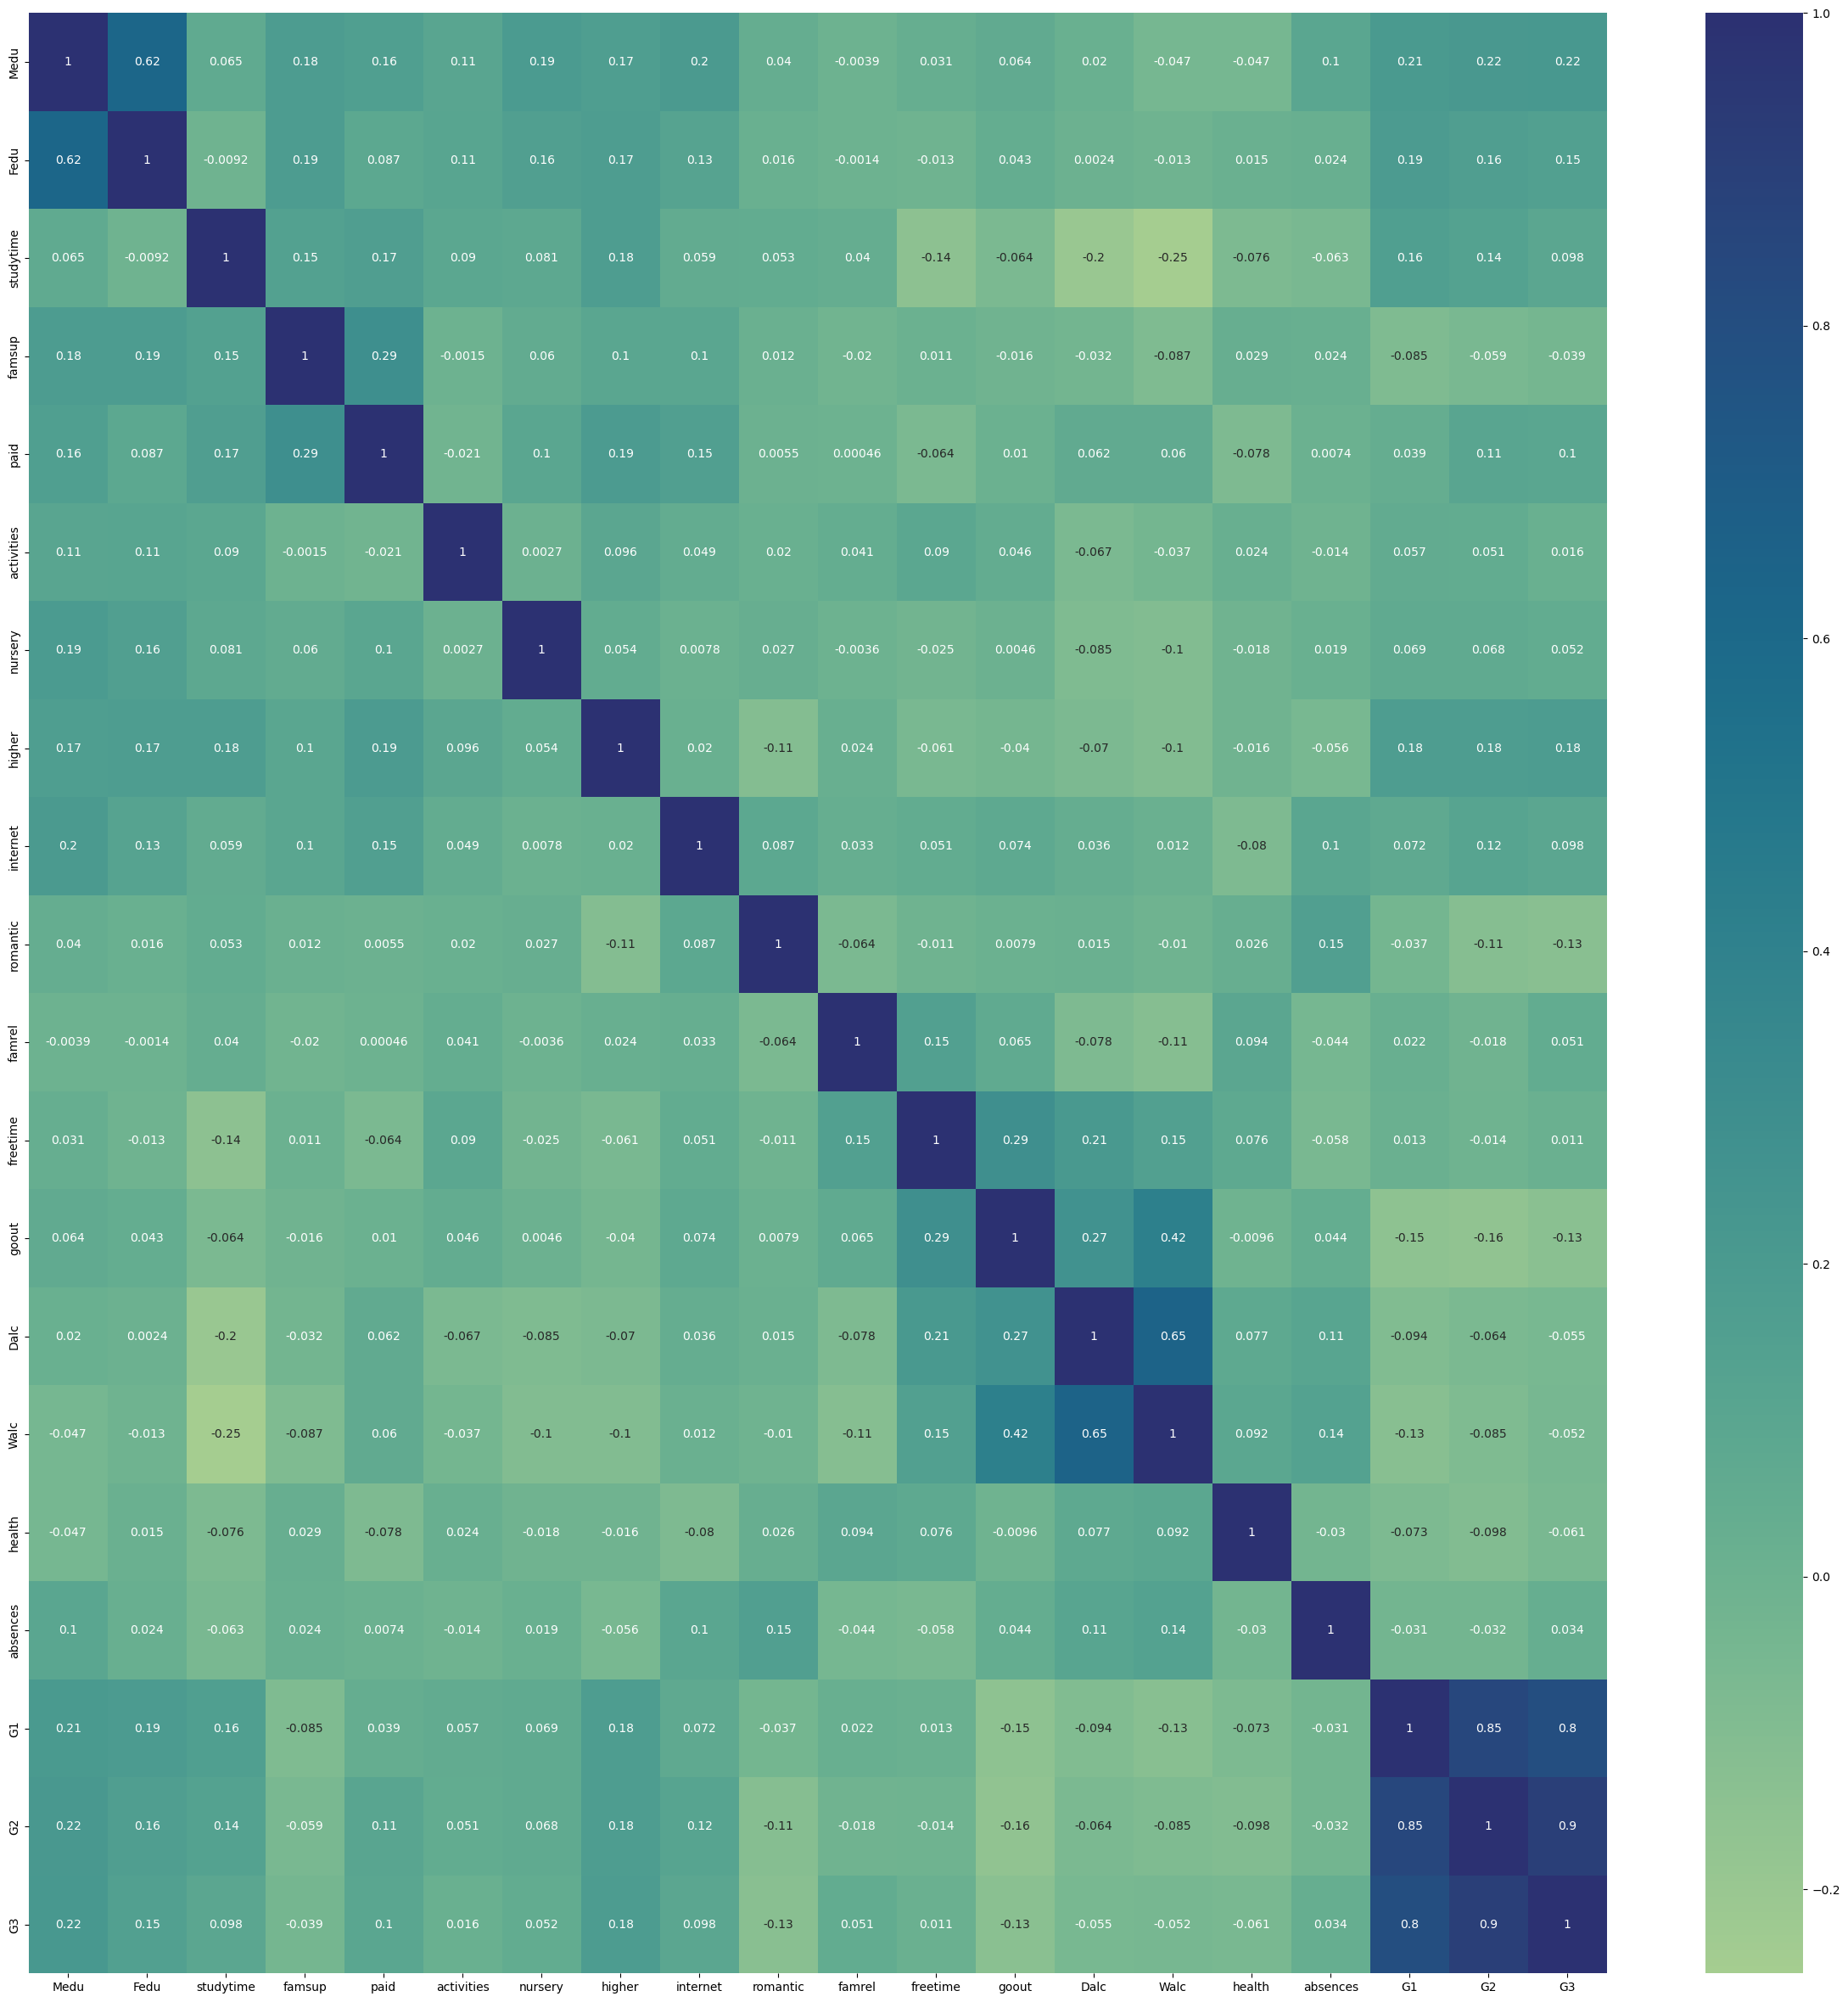

In [42]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="crest");

In [43]:
df=pd.get_dummies(df,drop_first=True)

In [44]:
df

,Medu,Fedu,studytime,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
0,4,4,2,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,1,1,2,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,1,1,2,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False
3,4,2,3,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False
4,3,3,2,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,2,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,True,True,True,False,False,False,True,False,False,False,True,False,False,False,False
391,3,1,1,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,True,True,True,True,False,False,True,False,False,False,True,False,False,False,False
392,1,1,1,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False
393,3,2,1,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,True,True,True,True,False,False,True,False,False,True,False,False,False,False,False


In [45]:
df.describe()

,Medu,Fedu,studytime,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.749367,2.521519,2.035443,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.094735,1.088201,0.839240,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Modelling

In [47]:
x=df[["G1","G2","romantic","internet","studytime"]]
#x=df.drop("G3",axis=1)
y=df["G3"]
# Deep Learning için yedek alıyoruz
xd=df[["G1","G2","romantic","internet","studytime"]]
yd=df["G3"]

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [49]:
algo_test(x,y)

,R_Squared,RMSE,MAE
ElasticNet,0.797594,2.037239,1.194892
Lasso,0.796743,2.041518,1.165390
mlp_regressor,0.794725,2.051625,1.221804
SVR,0.787927,2.085323,1.121298
Ridge,0.787349,2.088161,1.286370
Linear,0.787176,2.089012,1.287232
SGD,0.785420,2.097609,1.329733
Decision Tree,0.746328,2.280694,1.368143
KNeighborsRegressor,0.744397,2.289356,1.641402
AdaBoost,0.722872,2.383806,1.501266


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [52]:
lr=LinearRegression()

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
tahmin=lr.predict(x_test)

In [55]:
r2_score(y_test,tahmin)

0.7871757962077475

In [56]:
mean_squared_error(y_test,tahmin)**.5

2.0890118138844147

#### Feature Importance

In [58]:
feature_importance = pd.DataFrame({"Feature":x_train.columns,"Coefs":lr.coef_})

In [59]:
feature_importance=feature_importance.sort_values(by="Coefs",ascending=False)

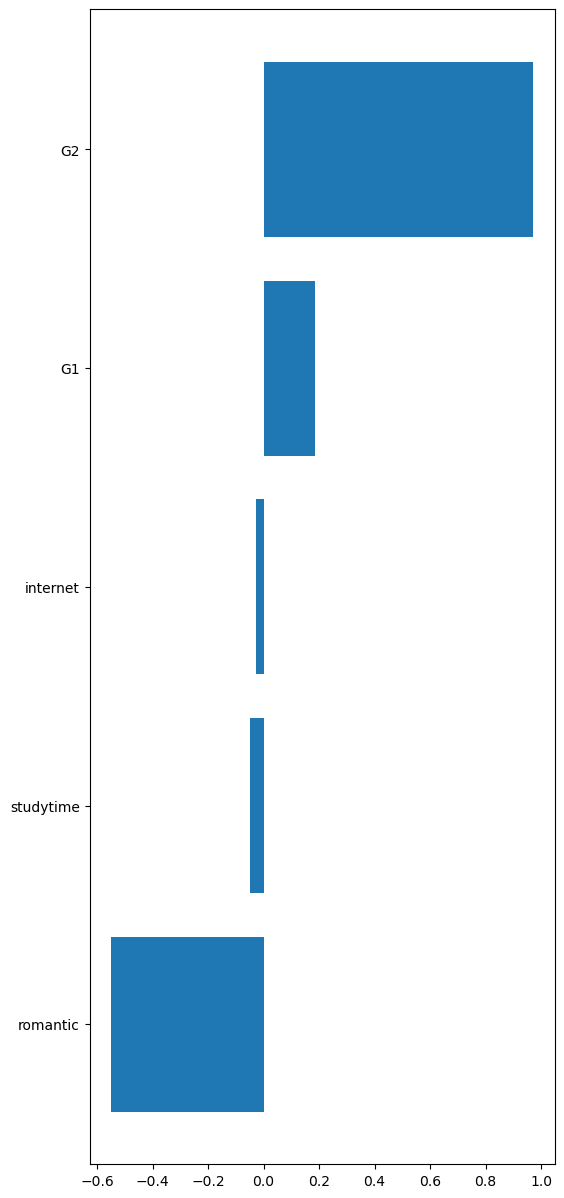

In [60]:
plt.figure(figsize=(6,15))
plt.barh(feature_importance["Feature"],feature_importance["Coefs"])
plt.gca().invert_yaxis() 

#### Residuals 

In [62]:
residuals=y_test-tahmin

<Axes: xlabel='G3', ylabel='Count'>

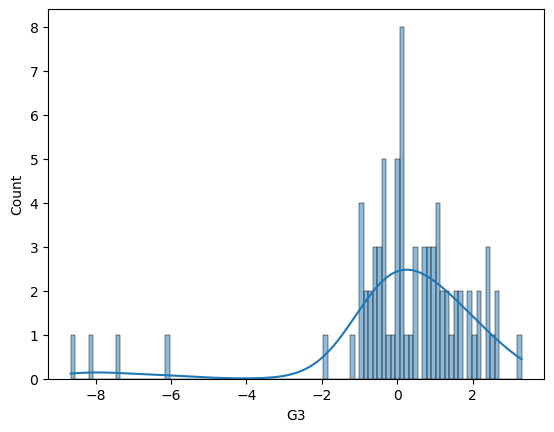

In [63]:
sns.histplot(residuals,kde=True,bins=100)

<Axes: xlabel='G3', ylabel='Density'>

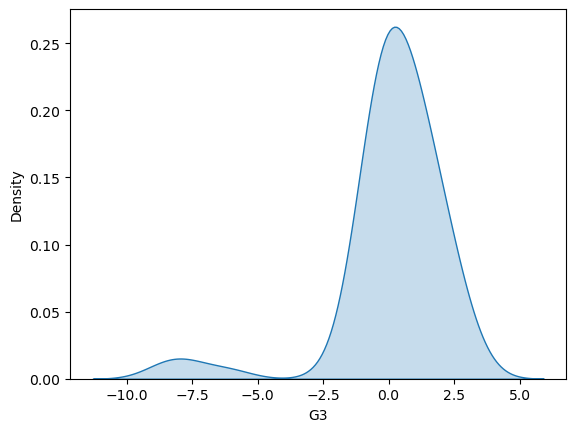

In [64]:
sns.kdeplot(residuals, fill=True)

In [65]:
model=lr.fit(x,y)

In [66]:
import pickle

In [67]:
pickle.dump(model,open("not.pkl","wb")) # Eğittiğimiz modeli kaydediyoruz

### Deep Learning

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [70]:
from sklearn.preprocessing import normalize, scale

In [71]:
xd=scale(xd)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(xd,yd,test_size=.20 ,random_state=42)

In [73]:
model=Sequential()
model.add(Dense(120,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1)) 
model.compile(loss="mse", optimizer="adam")                                                                           

In [74]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=500)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 130.8968 - val_loss: 137.2906
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 128.4604 - val_loss: 136.1736
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 127.4651 - val_loss: 135.4845
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 128.2229 - val_loss: 134.6847
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 128.4739 - val_loss: 133.6503
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 123.5799 - val_loss: 132.3925
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 124.1421 - val_loss: 130.8724
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 120.4016 - val_loss: 129.0212
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 116.4088 - val_loss: 126.7552
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 118.1366 - val_loss: 123.9127
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 114.0201 - val_loss: 120.3565
Epoch 12/500
3/3 ━━━━━━━━━━━━━

In [75]:
tahmin=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [76]:
mean_squared_error(tahmin,y_test)**.5

3.459903048605092

In [77]:
r2_score(tahmin,y_test)

0.5358319502059716

In [78]:
loss_f=pd.DataFrame(history.history)

<Axes: >

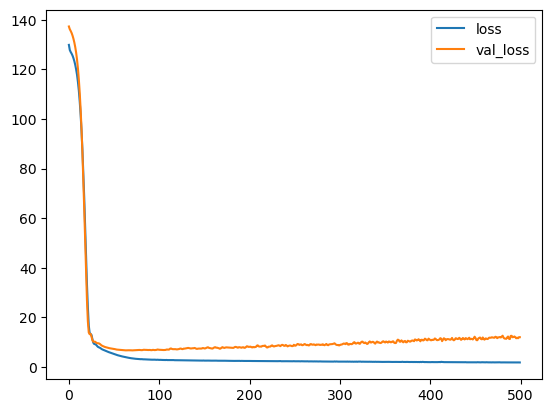

In [79]:
loss_f.plot()